# Linear Regreassion Using Pytorch

This tutorial will cover the process of developing a Regression Model using Pytorch.

1. **Regression Models** <br />
>Regression models helps in predicting future happenings between a dependent (target) and one or more independent variables (also known as a predictor).
Regression is one of the most common models of machine learning. The difference between Regression and Classification is that the first one predict a numerical value where the later identify the class an observation belong to.


![image](https://github.com/loukilitarik2020/Regression-Model/blob/main/TypesOfRegressionModels.png?raw=1)

            Linear Regression                    Logistics Regression              Polynomial Regression


2. **Correlation and its relation to Regression**

$~~$
$$
  r= \frac{\sum(x-\bar{x})(y-\bar{y})}{\sqrt{\sum(x-\bar{x})^2\sum(y-\bar{y})^2}}
$$  


$\hspace{18pt}$ This equation represents the total correlation of observed values for two variables in a sample
population. In simple linear regression, this would reflect the relationship between the single explanatory variable and the response variable.
![image](https://github.com/loukilitarik2020/Regression-Model/blob/main/correlationPlots.png?raw=1)

The correlation coefficients fall within a range of -1 to 1 where -1 is a perfectly negative correlation, 0 is no correlation, and 1 is a perfectly positive correlation. There are varying schools of thought on how to interpret these results but, generally speaking, values above .7 and below -.7 are regarded as red flags indicating possible collinearity (Akoglu, 2018). In such cases, further investigation should be made to ensure resulting linear models have minimal error.

4. **t-test**<br />
>The correlation coefficient, r , tells us about the strength and direction of the linear relationship between  x  and  y . However, the reliability of the linear model also depends on how many observed data points are in the sample. We need to look at both the value of the correlation coefficient  r  and the sample size  n , together. We perform a hypothesis test of the "significance of the correlation coefficient" to decide whether the linear relationship in the sample data is strong enough to use to model the relationship in the population.

![image](https://github.com/loukilitarik2020/Regression-Model/blob/main/PopulationSample.png?raw=1)

If we had data for the entire population, we could find the population correlation coefficient. But because we have only sample data, we cannot calculate the population correlation coefficient. The sample correlation coefficient,  r , is our estimate of the unknown population correlation coefficient.
The symbol for the population correlation coefficient is  ρ
, the Greek letter "rho."ρ=  population correlation coefficient (unknown)
r=  sample correlation coefficient (known; calculated from sample data)
The hypothesis test lets us decide whether the value of the population correlation coefficient  ρ  is "close to zero" or "significantly different from zero". We decide this based on the sample correlation coefficient  r
and the sample size  n.
We will only be using the two-tailed test for a population correlation coefficient  ρ . The hypotheses are:

$\hspace{35pt}$H0: ρ=0

$\hspace{35pt}$H1: ρ≠0

The hypothesis test lets us decide whether the value of the population correlation coefficient  ρ  is "close to zero" or "significantly different from zero". We decide this based on the sample correlation coefficient  r  and the sample size  n.

The t-test is a statistical test for the correlation coefficient. It can be used when  x  and  y  are linearly related, the variables are random variables, and when the population of the variable  y  is normally distributed.

The formula for the t-test statistic is

$$
t= r*{\sqrt(\frac{df}{(1-r^2)}})
$$

where r is the correlation coeficient, n is the sample number and df = n-2.

  
###Jupyter Notebook




In Python code, the import statement will allow the current module to access the code of another model (somehow similar the include operation in C/C++).

When invoking the import statement, the current module serches for the named module and bind it to the name selected in the local scope.

Here we are importing:

 **matplotlib.pyplot :**

 **numpy :**

 **torch :**

 **torch.utils.data :**


In [8]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

 **Synthetic data generation**

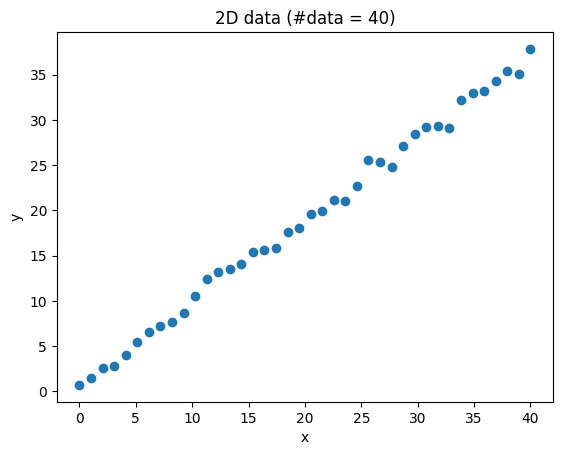

In [31]:
N = 40 # number of data points
m = .9
c = 1
#x = np.linspace(0,2*np.pi,N)
x = np.linspace(0,2*20.0,N)
y = m*x + c + np.random.normal(0,.7,x.shape)
plt.figure()
plt.plot(x,y,'o')
plt.xlabel('x')
plt.ylabel('y')
plt.title('2D data (#data = %d)' % N)
plt.show()

In [32]:
class MyDataset(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __len__(self):
        return len(self.x)

    def __getitem__(self, idx):
        sample = {
            'feature': torch.tensor([1,self.x[idx]]),
            'label': torch.tensor([self.y[idx]])}
        return sample

#What is a Tensor and what is used for ?
![image](https://github.com/loukilitarik2020/Regression-Model/blob/main/Tensor.png?raw=1)

A tensor is a container which can house data in N dimensions.tensors are generalizations of matrices to N-dimensional space. In addition, Tensors include descriptions of the valid linear transformations between tensors (e.g dot product, corss product ...).
Although a scalar, 1D array and 2D array can be considered as Tensors but in machine learning we will generaly be talking about matrices of a dimension ≥ 3.

In [33]:
dataset = MyDataset(x, y)

In [34]:

for i in range(len(dataset)):
    sample = dataset[i]
    print(i, sample['feature'], sample['label'])

0 tensor([1., 0.], dtype=torch.float64) tensor([0.7204], dtype=torch.float64)
1 tensor([1.0000, 1.0256], dtype=torch.float64) tensor([1.5233], dtype=torch.float64)
2 tensor([1.0000, 2.0513], dtype=torch.float64) tensor([2.6322], dtype=torch.float64)
3 tensor([1.0000, 3.0769], dtype=torch.float64) tensor([2.8040], dtype=torch.float64)
4 tensor([1.0000, 4.1026], dtype=torch.float64) tensor([4.0264], dtype=torch.float64)
5 tensor([1.0000, 5.1282], dtype=torch.float64) tensor([5.4877], dtype=torch.float64)
6 tensor([1.0000, 6.1538], dtype=torch.float64) tensor([6.5342], dtype=torch.float64)
7 tensor([1.0000, 7.1795], dtype=torch.float64) tensor([7.2277], dtype=torch.float64)
8 tensor([1.0000, 8.2051], dtype=torch.float64) tensor([7.6415], dtype=torch.float64)
9 tensor([1.0000, 9.2308], dtype=torch.float64) tensor([8.7011], dtype=torch.float64)
10 tensor([ 1.0000, 10.2564], dtype=torch.float64) tensor([10.5213], dtype=torch.float64)
11 tensor([ 1.0000, 11.2821], dtype=torch.float64) tensor(

In [35]:
batch_size = 4
shuffle = True
num_workers = 4
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=shuffle, num_workers=num_workers)

In [36]:
for i_batch, samples in enumerate(dataloader):
    print('\nbatch# = %s' % i_batch)
    print(samples)


batch# = 0
{'feature': tensor([[ 1.0000, 12.3077],
        [ 1.0000, 16.4103],
        [ 1.0000, 33.8462],
        [ 1.0000, 13.3333]], dtype=torch.float64), 'label': tensor([[13.1714],
        [15.6253],
        [32.2360],
        [13.5137]], dtype=torch.float64)}

batch# = 1
{'feature': tensor([[ 1.0000, 14.3590],
        [ 1.0000, 32.8205],
        [ 1.0000, 36.9231],
        [ 1.0000, 25.6410]], dtype=torch.float64), 'label': tensor([[14.0718],
        [29.1590],
        [34.3081],
        [25.5423]], dtype=torch.float64)}

batch# = 2
{'feature': tensor([[ 1.0000, 21.5385],
        [ 1.0000,  3.0769],
        [ 1.0000, 20.5128],
        [ 1.0000, 37.9487]], dtype=torch.float64), 'label': tensor([[19.9710],
        [ 2.8040],
        [19.5561],
        [35.3767]], dtype=torch.float64)}

batch# = 3
{'feature': tensor([[ 1.0000, 40.0000],
        [ 1.0000, 11.2821],
        [ 1.0000,  8.2051],
        [ 1.0000, 26.6667]], dtype=torch.float64), 'label': tensor([[37.8542],
        [12.

In [37]:
import torch.nn as nn
import torch.nn.functional as F
class MyModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(MyModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        out = self.linear(x)
        return out

In [38]:
input_dim = 2
output_dim = 1

model = MyModel(input_dim, output_dim)

In [39]:
cost = nn.MSELoss()

In [40]:
num_epochs = 10  # How many times the entire training data is seen?
l_rate = 0.01
optimiser = torch.optim.SGD(model.parameters(), lr = l_rate)

dataset = MyDataset(x, y)
batch_size = 4
shuffle = True
num_workers = 4
training_sample_generator = DataLoader(dataset, batch_size=batch_size, shuffle=shuffle, num_workers=num_workers)

for epoch in range(num_epochs):
    print('Epoch = %s' % epoch)
    for batch_i, samples in enumerate(training_sample_generator):
        # Convert the 'feature' tensor to float32
        samples['feature'] = samples['feature'].type(torch.float32)
        # Convert the 'label' tensor to float32
        samples['label'] = samples['label'].type(torch.float32)
        predictions = model(samples['feature'])
        error = cost(predictions, samples['label'])

        print('\tBatch = %s, Error = %s' % (batch_i, error.item()))

        # Before the backward pass, use the optimizer object to zero all of the
        # gradients for the variables it will update (which are the learnable
        # weights of the model). This is because by default, gradients are
        # accumulated in buffers( i.e, not overwritten) whenever .backward()
        # is called. Checkout docs of torch.autograd.backward for more details.
        optimiser.zero_grad()

        # Backward pass: compute gradient of the loss with respect to model
        # parameters
        error.backward()

        # Calling the step function on an Optimizer makes an update to its
        # parameters
        optimiser.step()

Epoch = 0
	Batch = 0, Error = 87.8817138671875
	Batch = 1, Error = 15097.2978515625
	Batch = 2, Error = 2554448.5
	Batch = 3, Error = 157538352.0
	Batch = 4, Error = 11383328768.0
	Batch = 5, Error = 740447027200.0
	Batch = 6, Error = 15557648711680.0
	Batch = 7, Error = 756369510629376.0
	Batch = 8, Error = 4.448260691748454e+16
	Batch = 9, Error = 5.023022114471412e+18
Epoch = 1
	Batch = 0, Error = 8.419414060437057e+20
	Batch = 1, Error = 7.939434514048243e+22
	Batch = 2, Error = 2.4290436247352293e+24
	Batch = 3, Error = 9.436711399078838e+25
	Batch = 4, Error = 2.0103071616277734e+28
	Batch = 5, Error = 3.945427335303731e+30
	Batch = 6, Error = 6.615483483238911e+32
	Batch = 7, Error = 9.636980929952554e+34
	Batch = 8, Error = 9.103702506322042e+36
	Batch = 9, Error = inf
Epoch = 2
	Batch = 0, Error = inf
	Batch = 1, Error = inf
	Batch = 2, Error = inf
	Batch = 3, Error = inf
	Batch = 4, Error = inf
	Batch = 5, Error = inf
	Batch = 6, Error = inf
	Batch = 7, Error = inf
	Batch = 8

In [ ]:
#x_for_plotting = np.linspace(0, 2*np.pi, 1000)
x_for_plotting = np.linspace(0, 2*20.0, 1000)
design_matrix = torch.tensor(np.vstack([np.ones(x_for_plotting.shape), x_for_plotting]).T, dtype=torch.float32)
print('Design matrix shape:', design_matrix.shape)

y_for_plotting = model.forward(design_matrix)
print('y_for_plotting shape:', y_for_plotting.shape)

Design matrix shape: torch.Size([1000, 2])
y_for_plotting shape: torch.Size([1000, 1])


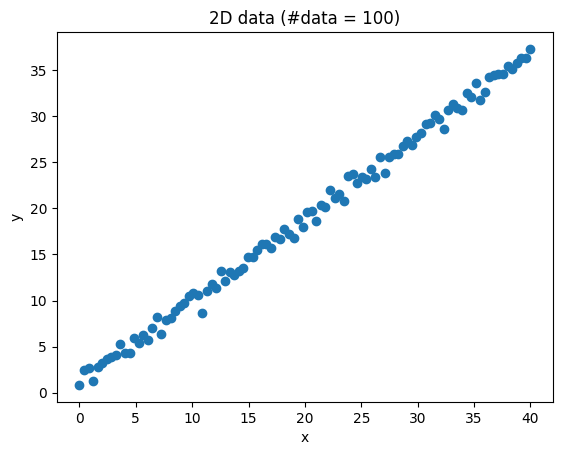

In [ ]:
plt.figure()
plt.plot(x,y,'o')
plt.plot(x_for_plotting, y_for_plotting.data.numpy(), 'r-')
plt.xlabel('x')
plt.ylabel('y')
plt.title('2D data (#data = %d)' % N)
plt.show()

In [98]:
##############################################################
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader

In [73]:
X = torch.arange(-5, 5, 0.1).view(-1, 1)
func = 5 * X + 2
Y = func + 3 * torch.randn(X.size())

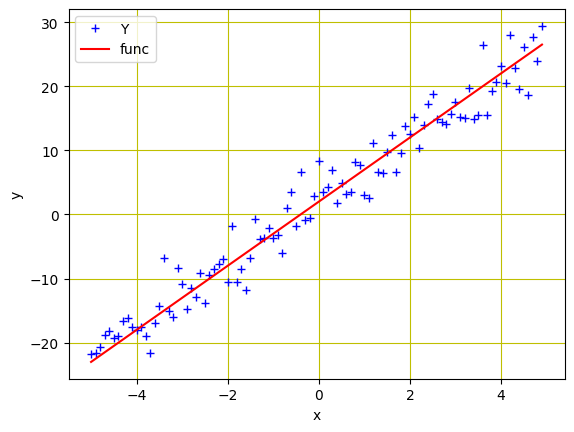

In [74]:
plt.plot(X.numpy(), Y.numpy(), 'b+', label='Y')
plt.plot(X.numpy(), func.numpy(), 'r', label='func')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid('True', color='y')
plt.show()

In [75]:
# defining the function for forward pass for prediction
def forward(x):
    return w * x + b

In [76]:
input_dim = 1
output_dim = 1
model = torch.nn.Linear(input_dim, output_dim)

In [77]:
print(list(model.parameters()))

[Parameter containing:
tensor([[0.7040]], requires_grad=True), Parameter containing:
tensor([-0.8744], requires_grad=True)]


In [78]:
model.state_dict()['weight'][0] = -10
model.state_dict()['bias'][0] = -20

In [79]:
print(list(model.parameters()))

[Parameter containing:
tensor([[-10.]], requires_grad=True), Parameter containing:
tensor([-20.], requires_grad=True)]


In [80]:
# Creating our dataset class
class Build_Data(Dataset):
    # Constructor
    def __init__(self):
        self.x = torch.arange(-5, 5, 0.1).view(-1, 1)
        self.func = 5 * self.x + 2
        self.y = self.func + 3 * torch.randn(self.x.size())
        self.len = self.x.shape[0]
    # Getting the data
    def __getitem__(self, index):
        return self.x[index], self.y[index]
    # Getting length of the data
    def __len__(self):
        return self.len

# Create dataset object
data_set = Build_Data()

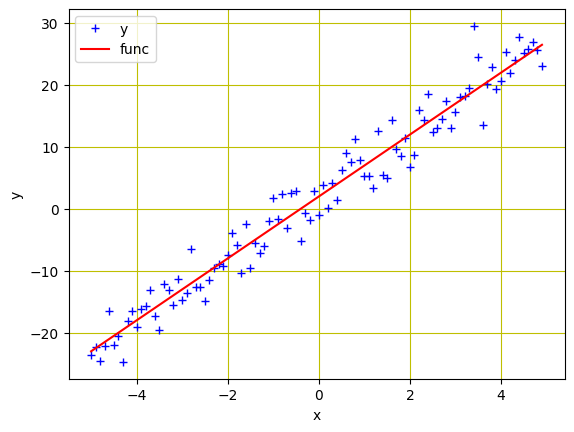

In [81]:
# Plot and visualizing the data points
plt.plot(data_set.x.numpy(), data_set.y.numpy(), 'b+', label = 'y')
plt.plot(data_set.x.numpy(), data_set.func.numpy(), 'r', label = 'func')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid('True', color='y')
plt.show()

In [94]:
# Creating Dataloader object
trainloader = DataLoader(dataset = data_set, batch_size=20)

In [95]:
# define optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
criterion = torch.nn.MSELoss()

In [96]:
loss_SGD = []
n_iter = 100

for i in range(n_iter):
    for x, y in trainloader:
        # making a pridiction in forward pass
        y_hat = model(x)
        # calculating the loss between original and predicted data points
        loss = criterion(y_hat, y)
        # store loss into list
        loss_SGD.append(loss.item())
        # zeroing gradients after each iteration
        optimizer.zero_grad()
        # backward pass for computing the gradients of the loss w.r.t to learnable parameters
        loss.backward()
        # updateing the parameters after each iteration
        optimizer.step()

        # priting the values for understanding
        print('{}, \t{}, \t{}, \t{}'.format(i, loss.item(), model.weight.grad, model.bias.grad))


0, 	6.776416778564453, 	tensor([[-8.4116]]), 	tensor([1.9152])
0, 	6.9992523193359375, 	tensor([[-3.0786]]), 	tensor([1.4989])
0, 	9.587974548339844, 	tensor([[-0.0979]]), 	tensor([-1.8010])
0, 	9.39078426361084, 	tensor([[1.6606]]), 	tensor([1.1262])
0, 	13.17866325378418, 	tensor([[-11.1493]]), 	tensor([-2.9312])
1, 	5.747347354888916, 	tensor([[-1.3727]]), 	tensor([0.2118])
1, 	6.674306392669678, 	tensor([[-1.8831]]), 	tensor([0.9613])
1, 	9.537389755249023, 	tensor([[-0.0143]]), 	tensor([-1.7651])
1, 	9.709467887878418, 	tensor([[2.8093]]), 	tensor([1.6717])
1, 	12.062056541442871, 	tensor([[-7.3029]]), 	tensor([-1.9769])
2, 	5.737984657287598, 	tensor([[1.1532]]), 	tensor([-0.3991])
2, 	6.599600791931152, 	tensor([[-1.4698]]), 	tensor([0.7767])
2, 	9.507802963256836, 	tensor([[0.0163]]), 	tensor([-1.7361])
2, 	9.884848594665527, 	tensor([[3.2706]]), 	tensor([1.8920])
2, 	11.752168655395508, 	tensor([[-5.8080]]), 	tensor([-1.6058])
3, 	5.777554988861084, 	tensor([[2.0161]]), 	tenso

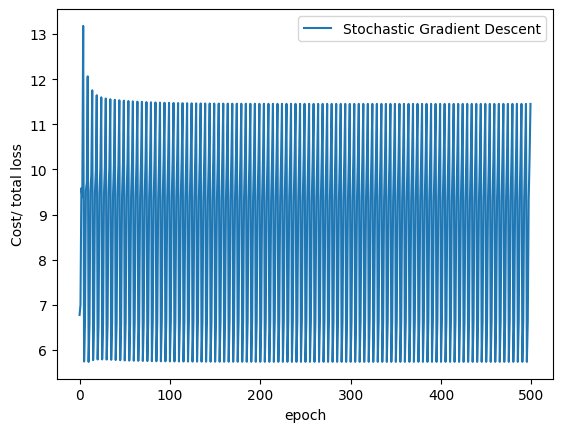

In [97]:
...
plt.plot(loss_SGD,label = "Stochastic Gradient Descent")
plt.xlabel('epoch')
plt.ylabel('Cost/ total loss')
plt.legend()
plt.show()

In [21]:
# evaluating data points with Mean Square Error.
def criterion(y_pred, y):
    return torch.mean((y_pred - y) ** 2)

In [22]:
w = torch.tensor(-10.0, requires_grad=True)
b = torch.tensor(-20.0, requires_grad=True)

In [25]:
step_size = 0.01
loss_list = []
iter = 100

In [26]:
for i in range (iter):
    # making predictions with forward pass
    Y_pred = forward(X)
    # calculating the loss between original and predicted data points
    loss = criterion(Y_pred, Y)
    # storing the calculated loss in a list
    loss_list.append(loss.item())
    # backward pass for computing the gradients of the loss w.r.t to learnable parameters
    loss.backward()
    # updateing the parameters after each iteration
    w.data = w.data - step_size * w.grad.data
    b.data = b.data - step_size * b.grad.data
    # zeroing gradients after each iteration
    w.grad.data.zero_()
    b.grad.data.zero_()
    # priting the values for understanding
    print('{}, \t{}, \t{}, \t{}'.format(i, loss.item(), w.item(), b.item()))

0, 	9.104931831359863, 	5.010401248931885, 	1.8080922365188599
1, 	9.102287292480469, 	5.011064052581787, 	1.8131023645401
2, 	9.099761962890625, 	5.011621475219727, 	1.8180129528045654
3, 	9.097347259521484, 	5.012090682983398, 	1.8228259086608887
4, 	9.095032691955566, 	5.012486457824707, 	1.8275431394577026
5, 	9.092815399169922, 	5.012821197509766, 	1.8321664333343506
6, 	9.090688705444336, 	5.013104438781738, 	1.8366975784301758
7, 	9.08864974975586, 	5.013345241546631, 	1.8411383628845215
8, 	9.086690902709961, 	5.013550281524658, 	1.845490574836731
9, 	9.084811210632324, 	5.013725280761719, 	1.849755883216858
10, 	9.0830078125, 	5.013875484466553, 	1.8539360761642456
11, 	9.081275939941406, 	5.014004707336426, 	1.8580328226089478
12, 	9.079612731933594, 	5.0141167640686035, 	1.862047791481018
13, 	9.078015327453613, 	5.014214038848877, 	1.8659825325012207
14, 	9.076482772827148, 	5.014298915863037, 	1.8698387145996094
15, 	9.0750093460083, 	5.014373779296875, 	1.8736178874969482

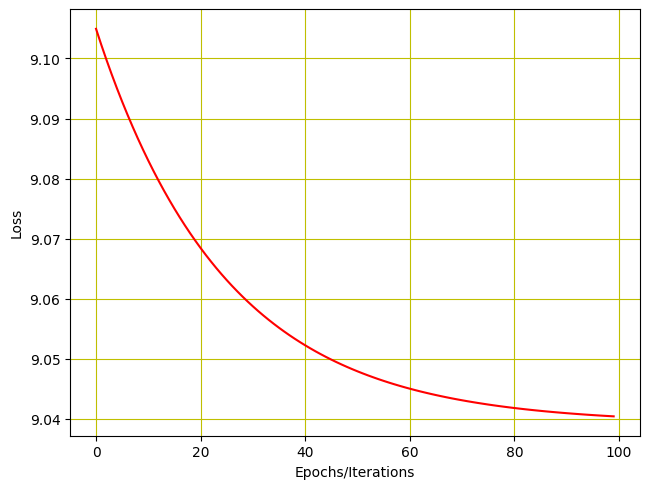

In [71]:
# Plotting the loss after each iteration
plt.plot(loss_list, 'r')
plt.tight_layout()
plt.grid('True', color='y')
plt.xlabel("Epochs/Iterations")
plt.ylabel("Loss")
plt.show()

In [27]:
func = 5 * X + 2
func_est = 5.015649795532227 * X + 2.024911403656006


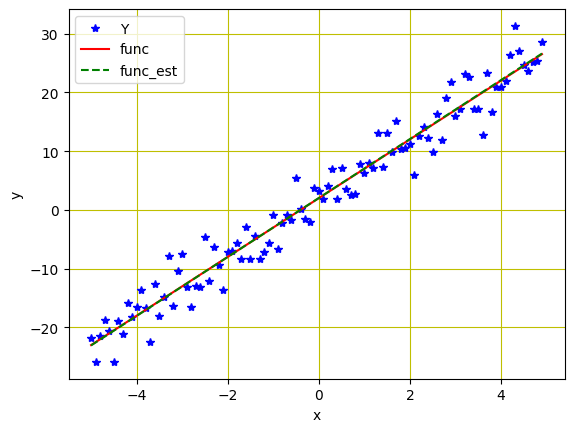

In [29]:
plt.plot(X.numpy(), Y.numpy(), 'b*', label='Y')
plt.plot(X.numpy(), func.numpy(), 'r', label='func')
plt.plot(X.numpy(), func_est.numpy(), 'g--', label='func_est')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid('True', color='y')
plt.show()